In [47]:
from datascience import *
import numpy as np
from notebook.services.config import ConfigManager
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cm = ConfigManager()
cm.update(
    "livereveal", {
        "width": "90%",
        "height": "70%",
        "scroll": True,
})

{'width': '90%', 'height': '70%', 'scroll': True}

# DSC 10 Discussion Week 3
---
Kyle Vigil

# What have we learned so far?
---

1. Python
  - Assigning variables
  - Working with data types
  - Calling functions
  - Defining functions
  - If... elif... else...
2. Arrays
  - Creating arrays (same type!)
  - Operations between arrays (add, mult)
  - Adding elements to arrays (using np.append)
3. Tables
  - Reading tables
  - Creating new tables
  - Grabbing data from columns
  - Creating a copy with additional columns
  - Creating a copy with only certain columns
  - Creating a copy with only certain rows
  - Creating a copy with rows grouped on a column and a collection function
4. Plots
  - Creating bar charts from 'category' and 'y' columns
  - Creating scatter plots and line plots from 'x' and 'y' columns
  - Creating histograms to count occurrences/density

# Any questions about recent things in class?
---

We don't necessarily need to get through this entire notebook, you can treat it more as a practice test that we're doing together.

What's most important is that we're all solid on the information covered in lecture, that way we can figure out how to apply it to various datasets and find answers to questions!

Anything and everything that you're unclear about, ask about it now!  No need to be shy, there are definitely others worried about the same thing.

# Ultimate Halloween Candy Showdown
---
269,000 user submitted winners of head to head candy matchups

In [48]:
candy = Table.read_table("data/candy.csv")
for col in ["chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus"]:
    candy = candy.with_column(col, candy.column(col).astype(bool))
candy

competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
100 Grand,True,False,True,False,False,True,False,True,False,0.732,0.86,66.9717
3 Musketeers,True,False,False,False,True,False,False,True,False,0.604,0.511,67.6029
One dime,False,False,False,False,False,False,False,False,False,0.011,0.116,32.2611
One quarter,False,False,False,False,False,False,False,False,False,0.011,0.511,46.1165
Air Heads,False,True,False,False,False,False,False,False,False,0.906,0.511,52.3415
Almond Joy,True,False,False,True,False,False,False,True,False,0.465,0.767,50.3475
Baby Ruth,True,False,True,True,True,False,False,True,False,0.604,0.767,56.9145
Boston Baked Beans,False,False,False,True,False,False,False,False,True,0.313,0.511,23.4178
Candy Corn,False,False,False,False,False,False,False,False,True,0.906,0.325,38.011
Caramel Apple Pops,False,True,True,False,False,False,False,False,False,0.604,0.325,34.5177


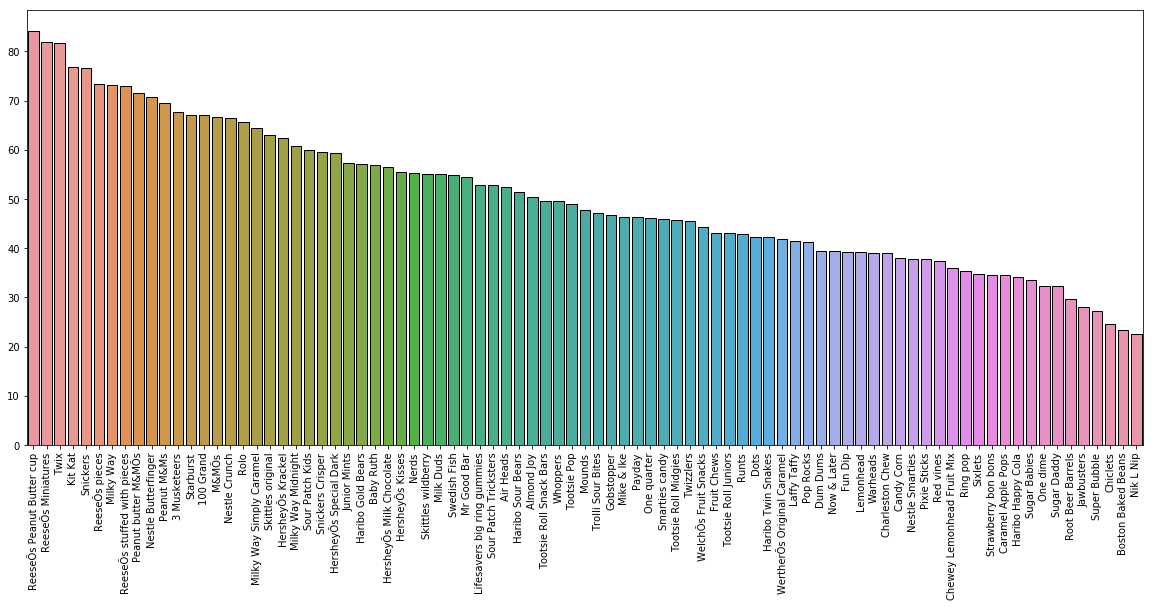

In [49]:
candy = candy.sort("winpercent", descending=True)
plt.figure(figsize=(20,8))
sns.barplot(candy.column("competitorname"), candy.column("winpercent"))
plt.xticks(rotation="vertical");

## Lets use group and plotting to analyze the data

* Group will show us aggregated data about groups of the data (ex. average score of chocolate candy vs. non chocolate candy)
* Plotting will give us visual insights to the data

### Grouping

In [50]:
# Interpret the meaning of the output generated from:
candy.group("chocolate")

chocolate,count
False,48
True,37


In [51]:
# Interpret the meaning of the output generated from:
candy.group("chocolate", np.mean)

chocolate,competitorname mean,fruity mean,caramel mean,peanutyalmondy mean,nougat mean,crispedricewafer mean,hard mean,bar mean,pluribus mean,sugarpercent mean,pricepercent mean,winpercent mean
False,,0.770833,0.0833333,0.0416667,0.0208333,0,0.291667,0.0208333,0.666667,0.452937,0.343021,42.1423
True,,0.027027,0.27027,0.324324,0.162162,0.189189,0.027027,0.540541,0.324324,0.512,0.632162,60.9215


In [52]:
# How does that compare to this output? What changes?
candy.group("chocolate", max)

chocolate,competitorname max,fruity max,caramel max,peanutyalmondy max,nougat max,crispedricewafer max,hard max,bar max,pluribus max,sugarpercent max,pricepercent max,winpercent max
False,WertherÕs Original Caramel,True,True,True,True,False,True,True,True,0.965,0.976,67.0376
True,Whoppers,True,True,True,True,True,True,True,True,0.988,0.976,84.1803


In [55]:
# What is different about this statement? How many rows do you expect?
candy.group(["chocolate", "caramel"], np.mean)

chocolate,caramel,competitorname mean,fruity mean,peanutyalmondy mean,nougat mean,crispedricewafer mean,hard mean,bar mean,pluribus mean,sugarpercent mean,pricepercent mean,winpercent mean
False,False,,0.818182,0.0454545,0.0227273,0,0.295455,0.0227273,0.704545,0.444727,0.335932,42.744
False,True,,0.25,0,0,0,0.25,0,0.25,0.54325,0.421,35.5226
True,False,,0.037037,0.333333,0.0740741,0.148148,0.037037,0.444444,0.37037,0.461074,0.601185,59.0122
True,True,,0,0.3,0.4,0.3,0,0.8,0.2,0.6495,0.7158,66.0766


### Plotting

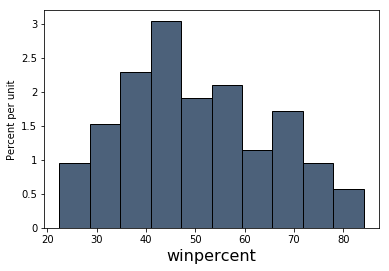

In [56]:
# Create a histogram of the winpercentages
candy.hist("winpercent")

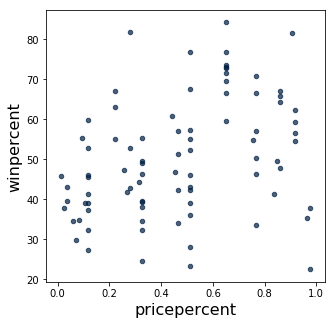

In [57]:
# See if price percentage has an effect on win percentage. What type of graph can we use for this?
candy.scatter("pricepercent", "winpercent")

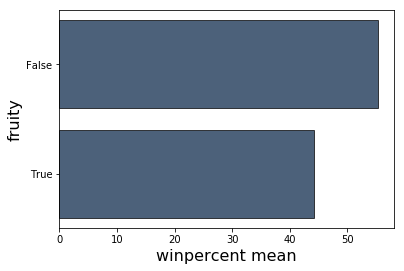

In [63]:
# What type of graph should we use for plotting fruity vs non fruity average win percentage?
candy.group("fruity", np.mean).select("fruity", "winpercent mean").barh("fruity", "winpercent mean")

# Functions and Apply
---

Review: How do you make a function return a string that is lowercased and then add " <- this is now lowercase" to the end? 

In [73]:
def lowercase(string):
    return string.lower() + " <- this is now lowercase"

lowercase("sTrInG")

'string <- this is now lowercase'

We can use functions to clean up messy data. A good example of messy data comes from a column of user inputted data

In [74]:
survey_responses = Table().with_columns({
    "name": ["Kyle", "Meghan", "Taylor", "Tyler", "Josh", " Chad"],
    "fav_food": ["Pizza", "pizza", "turkey sandwich", "pepperoni pizza", "Pepperoni Pizza", "ham sandwich"], 
    "phone": ["123-456-7890", "(123) 456-7890", "1234567890", "(123)4567890", "123 456 7890", "(123)456-7890"]
})
survey_responses

name,fav_food,phone
Kyle,Pizza,123-456-7890
Meghan,pizza,(123) 456-7890
Taylor,turkey sandwich,1234567890
Tyler,pepperoni pizza,(123)4567890
Josh,Pepperoni Pizza,123 456 7890
Chad,ham sandwich,(123)456-7890


This table has difficult to access and analyze data. We can use our own functions and apply to clean it up.

1. clean up fav_food by making it lowercase and only the last word of the input

2. clean up the phone number by making it a string with only 10 digits in it (what about storing it as an int?)

In [75]:
# Make a function to clean up one entry of fav_food (lowercase and only last word)
def clean_fav_food(string):
    return string.lower().split(" ")[-1]
    
clean_fav_food("this is a test")

'test'

In [76]:
survey_responses

name,fav_food,phone
Kyle,Pizza,123-456-7890
Meghan,pizza,(123) 456-7890
Taylor,turkey sandwich,1234567890
Tyler,pepperoni pizza,(123)4567890
Josh,Pepperoni Pizza,123 456 7890
Chad,ham sandwich,(123)456-7890


In [77]:
# apply this function to the fav_food column
survey_responses = survey_responses.with_column("fav_food", survey_responses.apply(clean_fav_food, 'fav_food'))
survey_responses

name,fav_food,phone
Kyle,pizza,123-456-7890
Meghan,pizza,(123) 456-7890
Taylor,sandwich,1234567890
Tyler,pizza,(123)4567890
Josh,pizza,123 456 7890
Chad,sandwich,(123)456-7890


In [ ]:
# apply this function to the fav_food column
survey_responses = survey_responses.with_column("fav_food", survey_responses.apply(clean_fav_food, "fav_food"))
survey_responses

In [78]:
# Make a function to clean up one entry of phone (10 digit string)
def clean_phone(phone):
    return phone.replace("(","").replace(")","").replace("-","").replace(" ", "")
    
clean_phone("(123)456-7890")

'1234567890'

In [79]:
# apply this function to the phone column
survey_responses = survey_responses.with_column("phone", survey_responses.apply(clean_phone, "phone"))
survey_responses

name,fav_food,phone
Kyle,pizza,1234567890
Meghan,pizza,1234567890
Taylor,sandwich,1234567890
Tyler,pizza,1234567890
Josh,pizza,1234567890
Chad,sandwich,1234567890


## Our dataset is now clean and ready for analysis!

# More Practice! Today's Dataset:
---

From kaggle user Randi H Griffin:
>This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018. The R code I used to scrape and wrangle the data is on GitHub. I recommend checking my kernel before starting your own analysis.
>
>Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.
>
>The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:
>
>1. ID - Unique number for each athlete  
>2. Name - Athlete's name  
>3. Sex - M or F  
>4. Age - Integer  
>5. Height - In centimeters  
>6. Weight - In kilograms  
>7. Team - Team name  
>8. NOC - National Olympic Committee 3-letter code  
>9. Games - Year and season  
>10. Year - Integer  
>11. Season - Summer or Winter  
>12. City - Host city  
>13. Sport - Sport  
>14. Event - Event  
>15. Medal - Gold, Silver, Bronze, or NA  


In [80]:
data = Table.read_table("data/athlete_events.csv")
data

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
3,Gunnar Nielsen Aaby,M,24,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan
4,Edgar Lindenau Aabye,M,34,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,nan
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",nan
5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,nan
5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",nan
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,nan
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",nan


Since the olympics didn't stagger the winter and summer games until 1992, let's look at only years after 1992.

In [81]:
data = data.where("Year", are.above(1992))
data

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,nan
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",nan
6,Per Knut Aaland,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan
6,Per Knut Aaland,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,nan
6,Per Knut Aaland,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pursuit,nan
6,Per Knut Aaland,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres Relay,nan
7,John Aalberg,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan
7,John Aalberg,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,nan
7,John Aalberg,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pursuit,nan


Alright.  We got rid of a lot data (and notice that we got rid of many of Christine Jacoba Aaftink's games), but it should be more manageable now.

Also, while we're at it, let's ignore rows with "mismatched" values.  You don't *need* to know how this next code block works, but feel free to follow along.

In [82]:
nans = np.argwhere(np.isnan(data.column("Age")) | np.isnan(data.column("Height")) | np.isnan(data.column("Weight")))
data.take(nans[:3]).show() # This line is just to show us what these mismatched rows look like
print("We're getting rid of rows like these!")
data = data.exclude(nans.flatten())

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
[21],['Ragnhild Margrethe Aamodt'],['F'],[27.],[163.],[nan],['Norway'],['NOR'],['2008 Summer'],[2008],['Summer'],['Beijing'],['Handball'],"[""Handball Women's Handball""]",['Gold']
[48],['Abdelhak Aatakni'],['M'],[24.],[nan],[64.],['Morocco'],['MAR'],['2012 Summer'],[2012],['Summer'],['London'],['Boxing'],"[""Boxing Men's Light-Welterweight""]",['nan']
[78],['Salim Abanoz'],['M'],[26.],[nan],[nan],['Turkey'],['TUR'],['1996 Summer'],[1996],['Summer'],['Atlanta'],['Judo'],"[""Judo Men's Lightweight""]",['nan']


We're getting rid of rows like these!


# Interesting Analysis
---
1. Average age of medal winners.
    - Does this change for males and females?
    - min/max age of medal winners?
        - find their entries
2. Sports with the tallest/heaviest/oldest participants?
3. Count of sport season by team country.
4. Plot age by year, possibly split by sex.

In [85]:
# Warmup: Find the sports with the heaviest average competitor weight. 
# Extra credit: can you guess what events these would be before we find them?
data.group("Sport", np.mean).sort("Age mean", descending=True)

Sport,ID mean,Name mean,Sex mean,Age mean,Height mean,Weight mean,Team mean,NOC mean,Games mean,Year mean,Season mean,City mean,Event mean,Medal mean
Equestrianism,67700.6,,,36.41,174.816,67.996,,,,2006.34,,,,
Shooting,65196.4,,,31.5359,172.985,73.6622,,,,2005.95,,,,
Curling,72902.3,,,31.1366,174.168,72.1317,,,,2005.42,,,,
Golf,70397.8,,,29.5833,174.046,71.1944,,,,2016,,,,
Beach Volleyball,68750.5,,,29.1357,186.203,79.0892,,,,2006.68,,,,
Skeleton,71618.2,,,28.9653,176.098,74.0867,,,,2008.34,,,,
Bobsleigh,71039.8,,,28.8417,182.745,92.3825,,,,2004.19,,,,
Sailing,66794.4,,,28.4518,177.522,74.0316,,,,2005.98,,,,
Triathlon,69368.9,,,27.8935,173.641,61.8175,,,,2008.23,,,,
Handball,66785.5,,,27.3387,183.8,82.0386,,,,2006.62,,,,


# Repeat Participants vs One-Timers
---

Who showed up multiple times?  Who only showed up once?

Can we get a table of just those people and their data?

In [100]:
# Let's get how many times each person was in the dataset
counts = data.group(["Name","Year"]).group("Name")
counts

Name,count
Th Anh,1
Th Ngn Thng,2
A Lamusi,1
"A. J. Tyronne Benildus ""Benny"" Fernando",1
"A. Joshua ""Josh"" West",2
Aadam Ismaeel Khamis,1
Aagje Vanwalleghem,1
Aarik Wilson,1
Aarn Galindo Rubio,1
Aarn Sarmiento Padilla,2


In [93]:
# How to get just the names that have count > 1?
repeat_names = counts.where("count", are.above(1)).column("Name")
repeat_names

array([' Th Ngn Thng', 'A. Joshua "Josh" West', 'Aarn Sarmiento Padilla',
       ..., 'verton dos Santos Lopes', 'zlem Kaya', 'zzet nce'],
      dtype='<U70')

And now we want just the data of people who were repeat participants.

In [94]:
# Now as simple as using a .where() statement
repeats = data.where("Name", are.contained_in(repeat_names))
repeats

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
13,Minna Maarit Aalto,F,30,159,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,nan
13,Minna Maarit Aalto,F,34,159,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,nan
20,Kjetil Andr Aamodt,M,22,176,85,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
20,Kjetil Andr Aamodt,M,22,176,85,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze
20,Kjetil Andr Aamodt,M,22,176,85,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Giant Slalom,nan
20,Kjetil Andr Aamodt,M,22,176,85,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Slalom,nan
20,Kjetil Andr Aamodt,M,22,176,85,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver
20,Kjetil Andr Aamodt,M,26,176,85,Norway,NOR,1998 Winter,1998,Winter,Nagano,Alpine Skiing,Alpine Skiing Men's Downhill,nan
20,Kjetil Andr Aamodt,M,26,176,85,Norway,NOR,1998 Winter,1998,Winter,Nagano,Alpine Skiing,Alpine Skiing Men's Super G,nan
20,Kjetil Andr Aamodt,M,26,176,85,Norway,NOR,1998 Winter,1998,Winter,Nagano,Alpine Skiing,Alpine Skiing Men's Giant Slalom,nan


# Beginning Age --> Repeat or One-Timer?
---

Can we tell if you'll participate in the Olympics again based on your age?

In [96]:
# If someone showed up multiple times they were probability pretty young at their first olympics, right?
# Let's find the avg min age of these repeat participants, and compare it to avg age of one-time participants
onetimes = data.where("Name", are.not_contained_in(repeat_names))

In [97]:
# How will we take avg of min ages for all participants?
# Well, by grouping of course!
# Let's only select the columns we need
min_ages_repeats = repeats.select("Name", "Age").group("Name", min)

# Why don't we need to do any of that here?
ages_onetimes = onetimes.select("Name", "Age")

min_ages_repeats

Name,Age min
Th Ngn Thng,19
"A. Joshua ""Josh"" West",27
Aarn Sarmiento Padilla,21
Aaron Arthur Cook,17
Aaron Brown,20
Aaron Gate,21
"Aaron J. ""AJ"" Bear",25
Aaron John McIntosh,24
Aaron March,23
Aaron Wells Peirsol,17


In [98]:
# Now as simple as comparing the means of the Age columns in the two tables
avg_min_age_repeats = np.mean(min_ages_repeats.column("Age min"))
avg_ages_onetimes = np.mean(ages_onetimes.column("Age"))

print("Average Beginning Age of Repeat Participants:", avg_min_age_repeats)
print("Average Age of One-Time Participants:", avg_ages_onetimes)

Average Beginning Age of Repeat Participants: 23.45873601593159
Average Age of One-Time Participants: 24.73526132404181


# Age distributions
---

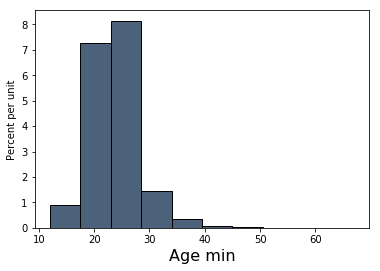

In [99]:
# Hmm... not as different as I would have expected.

# Let's plot the ditributions to look into this further

min_ages_repeats.hist("Age min")

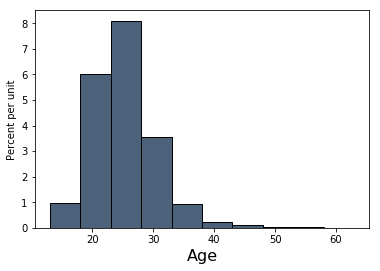

In [101]:
ages_onetimes.hist("Age")

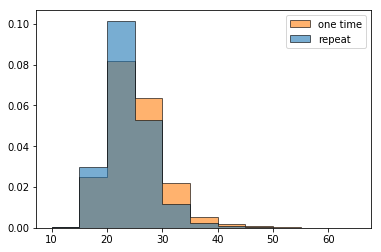

In [104]:
# Don't worry about these next code blocks, just focus on the histograms they create
import matplotlib.pyplot as plt
plt.hist(
    [min_ages_repeats.column("Age min"), ages_onetimes.column("Age")],
    bins=np.arange(10, 70, 5),
    density=True,
    histtype="stepfilled", alpha=0.6
)
plt.legend(["one time","repeat"]);

What percent of repeats/one-timers are 20-25?

Let's recall the axis label *"percent per unit"*

**Unit = Bin Size**

Then, there's some math
$$"percent\ per\ unit"=\frac{percent}{bin\_size}$$

$$"percent\ per\ unit" *\ bin\_size=percent$$

In [105]:
# So, the percent of repeats that were 20-25 at their first game is:
0.1 * 5 * 100

50.0

In [106]:
# And the percent of one-timers that were 20-25 is:
0.08 * 5 * 100

40.0

But what are those percents out of?

In [107]:
# The percent of repeats is out of:
"""
total number of repeat olympians
"""

# The percent of one-timers is out of:
"""
total number of one-time olympians
"""

'\ntotal number of one-time olympians\n'

So how would we find the *number* of repeats between 20-25 at their first game versus the *number* of one-timers between 20-25?

In [ ]:
# To turn percent into a count we:
"""
multiply by the population size
"""

In [108]:
# Some code to get the "population sizes" of `min_ages_repeats` and `ages_onetimes`
# and multiply by the proportion
num_repeats_2025 = min_ages_repeats.num_rows * .5
num_onetimes_2025 = ages_onetimes.num_rows * .4

print(num_repeats_2025, num_onetimes_2025)

8536.5 17220.0


Let's instead take a look at the count histogram.

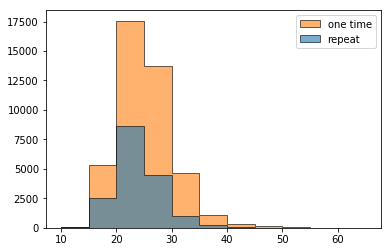

In [109]:
plt.hist(
    [min_ages_repeats.column("Age min"), ages_onetimes.column("Age")],
    bins=np.arange(10, 70, 5),
    density=False,
    histtype="stepfilled", alpha=0.6
)
plt.legend(["one time","repeat"]);

So, if you're 20-25, are you more likely to be a repeat or a one-timer?

How do you know this, and why might it be the case?

In [110]:
# Our answer goes here
"""
One-timer because the number of olympians aged 20-25 for their first olympics was more for one-timers than repeat olympians.

This is likely because it is much harder to be a repeat olympian and therefore more people are one-time olympians
"""

'\nOne-timer because the number of olympians aged 20-25 for their first olympics was more for one-timers than repeat olympians.\n\nThis is likely because it is much harder to be a repeat olympian and therefore more people are one-time olympians\n'